# Библиотека OpenCV

OpenCV - это библиотека компьютерного зрения с открытым исходным кодом, которая предоставляет различные функции для обработки изображений и видео. Первоначально она была разработана компанией Intel в 1999 году, а сейчас поддерживается сообществом OpenCV. Она написана на C++, но также имеет реализации для Python.

OpenCV можно использовать для решения различных задач, таких как обнаружение объектов, распознавание лиц и обработка изображений. Мы сосредоточимся на обработке изображений с помощью OpenCV в Python.

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
IMAGE_PATH = '/content/drive/MyDrive/Colab Notebooks/image.jpg'

## Чтение и отображение изображений

Для чтения изображения с помощью OpenCV мы можем использовать функцию `cv2.imread()`. Эта функция принимает в качестве аргумента путь к изображению и возвращает массив NumPy, содержащий данные изображения. По умолчанию изображение считывается в цветном режиме.

Мы выводим изображение с помощью функции `cv2_imshow()` – патча для Google Colab. Встроенная функция OpenCV `cv2.imshow()` часто вызывает зависания Jupyter Notebook.

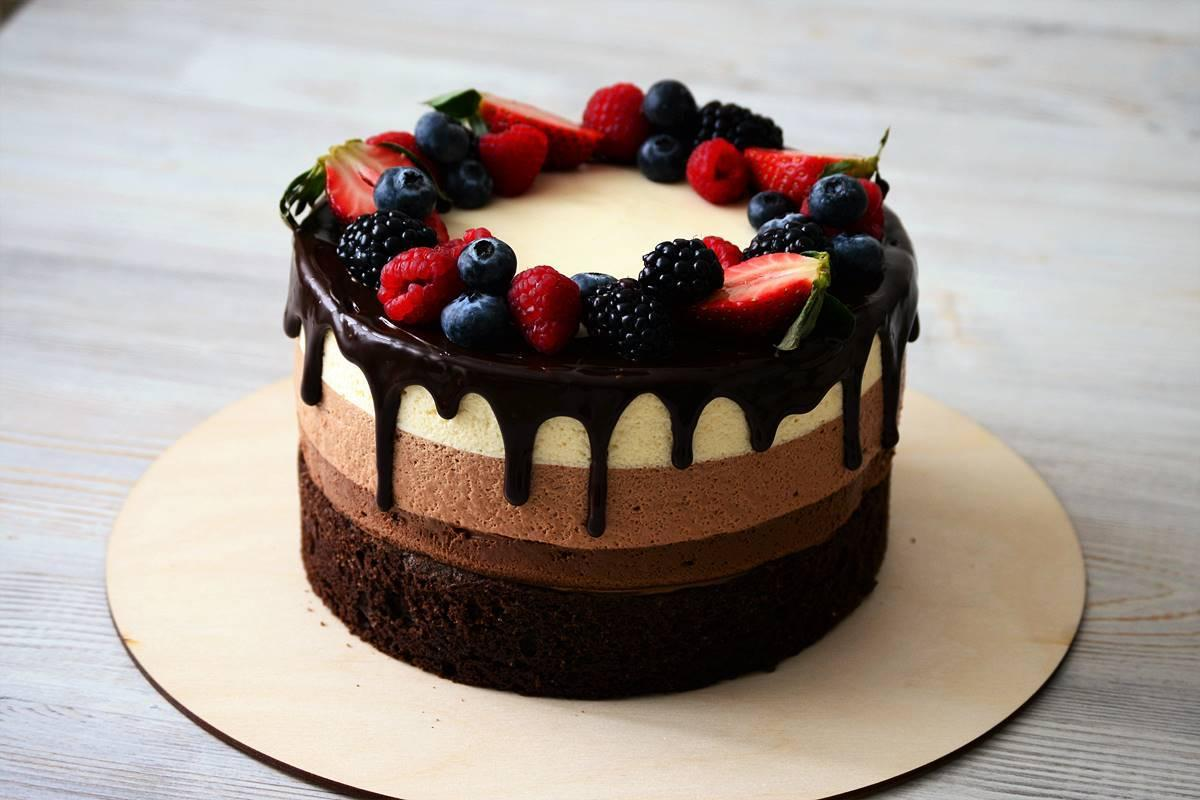

In [ ]:
# считаем изображение
img = cv2.imread(IMAGE_PATH)

# выведем изображение
cv2_imshow(img)

In [ ]:
print(img) # напечатаем переменную, которая хранит в себе изображение

[[[ 42  53  67]
  [ 42  53  67]
  [ 38  52  64]
  ...
  [186 185 181]
  [186 185 181]
  [186 185 181]]

 [[ 42  53  67]
  [ 41  52  66]
  [ 38  52  64]
  ...
  [187 186 182]
  [187 186 182]
  [186 185 181]]

 [[ 41  53  65]
  [ 40  52  64]
  [ 37  51  63]
  ...
  [188 187 183]
  [188 187 183]
  [188 187 183]]

 ...

 [[199 186 188]
  [194 183 185]
  [196 183 185]
  ...
  [116 118 119]
  [114 116 117]
  [114 116 117]]

 [[207 196 199]
  [202 193 196]
  [202 191 194]
  ...
  [135 137 138]
  [139 141 142]
  [142 144 145]]

 [[205 196 199]
  [203 194 197]
  [202 193 196]
  ...
  [153 155 156]
  [154 156 157]
  [155 157 158]]]


**Пиксель** – это наименьшая единица цифрового изображения. Каждый пиксель обычно представлен комбинацией числовых значений, которые представляют интенсивность или цвет пикселя. Количество каналов в изображении представляет собой число компонентов, используемых для представления каждого пикселя.

В полутоновом изображении каждый пиксель представлен одним числовым значением, которое представляет интенсивность пикселя. Поэтому изображение в градациях серого имеет только один канал. *Изображение в оттенках серого хранит только одно значение - целое число от 0 до 255.*

В цветном изображении каждый пиксель представлен тремя числовыми значениями, которые представляют интенсивность красного, зеленого и синего компонентов пикселя. Эти три компонента обычно называются каналами RGB. *Цветное изображение хранит три значения: три целых числа от 0 до 255.*

Некоторые форматы изображений, такие как RGBA (красный, зеленый, синий и альфа) или CMYK (голубой, пурпурный, желтый и черный), используют более трех каналов для представления каждого пикселя.

Понимание количества каналов в изображении важно при работе с библиотеками обработки изображений, такими как OpenCV, или при работе с файлами изображений. Это может повлиять на то, как изображение загружается, отображается и обрабатывается.

Библиотека OpenCV хранит каналы формата BGR: синий, зеленый и красный цвета. Мы привыкли к порядку: красный, зеленый и синий.





In [ ]:
print(img.shape) # выводит ширину, высоту и количество каналов изображения

(800, 1200, 3)


## Перевод в градации серого

Метод `cv2.cvtColor()` используется для преобразования изображения из одного цветового пространства в другое. В OpenCV доступно более 150 методов преобразования цветового пространства (https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html).

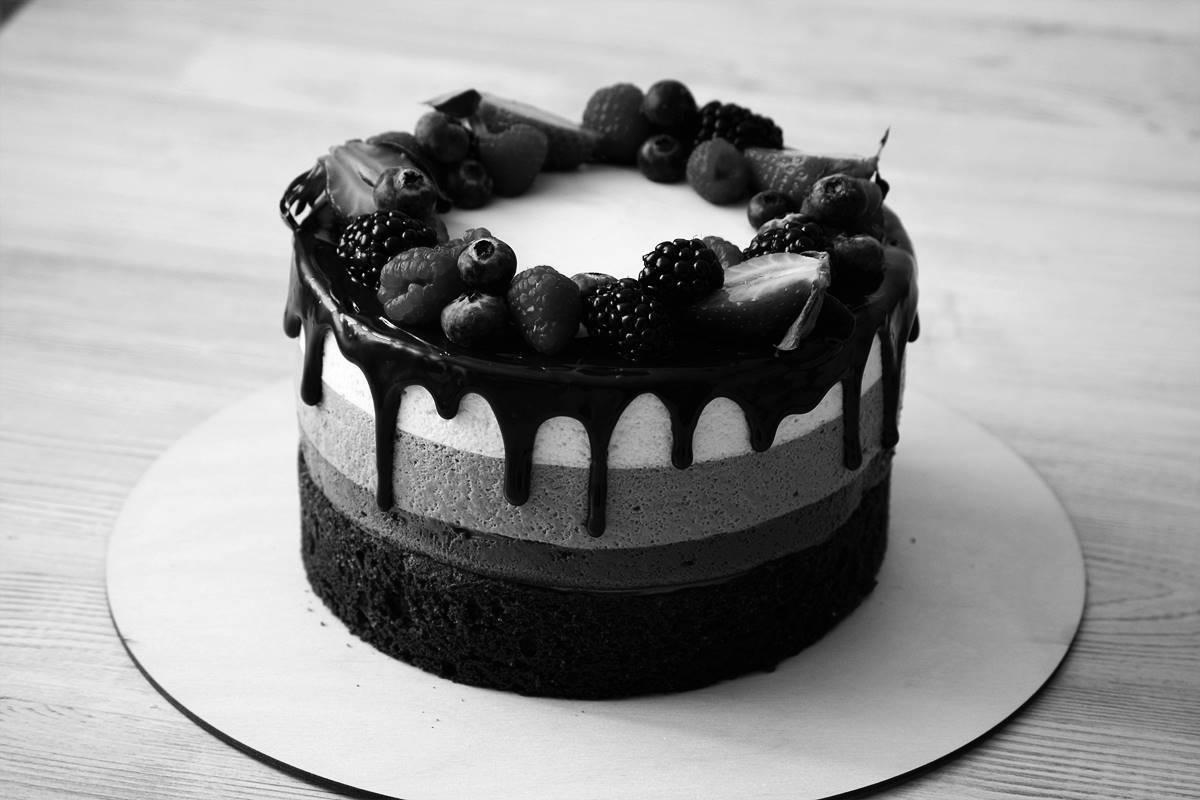

In [ ]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# отображение нового изображения
cv2_imshow(gray_img)

In [ ]:
print(gray_img) # напечатаем переменную, которая хранит в себе изображение

[[ 56  56  54 ... 184 184 184]
 [ 56  55  54 ... 185 185 184]
 [ 55  54  53 ... 186 186 186]
 ...
 [188 185 185 ... 118 116 116]
 [198 195 193 ... 137 141 144]
 [198 196 195 ... 155 156 157]]


## Изменение размера

Чтобы изменить размер изображения, мы можем использовать функцию `resize()`. Функция принимает два аргумента: изображение, размер которого нужно изменить, и новый размер изображения.

In [ ]:
# уменьшим изображение вполовину – то есть зададим высоту и ширину как 50% от исходного изображения

width = int(img.shape[1] * 0.5) # аналогично img.shape[1] дает ширину изображения
height = int(img.shape[0] * 0.5) # атрибут shape переменной img возвращает кортеж (height, width, channels), где img.shape[0] - высота изображения

resized_img = cv2.resize(img, (width, height)) # функция cv2.resize() принимает два аргумента: входное изображение и новые размеры в формате кортежа (ширина, высота). 

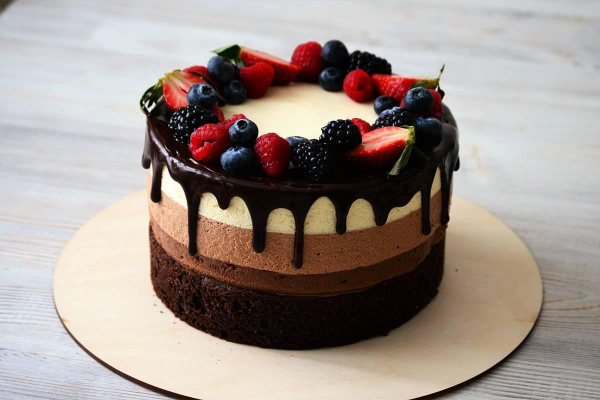

In [ ]:
cv2_imshow(resized_img)

In [ ]:
resized_img.shape

(400, 600, 3)

## Кадрирование изображения

Чтобы обрезать изображение можно использовать срез данных.

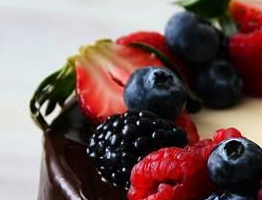

In [ ]:
cropped = img[100:300, 250:512] # координаты: [y0:y1, x0:x1]

cv2_imshow(cropped)

## Вращение изображений

Чтобы повернуть изображение, мы можем использовать функцию `rotate()`. Функция принимает три аргумента: изображение, которое нужно повернуть, угол поворота в градусах и центр поворота.

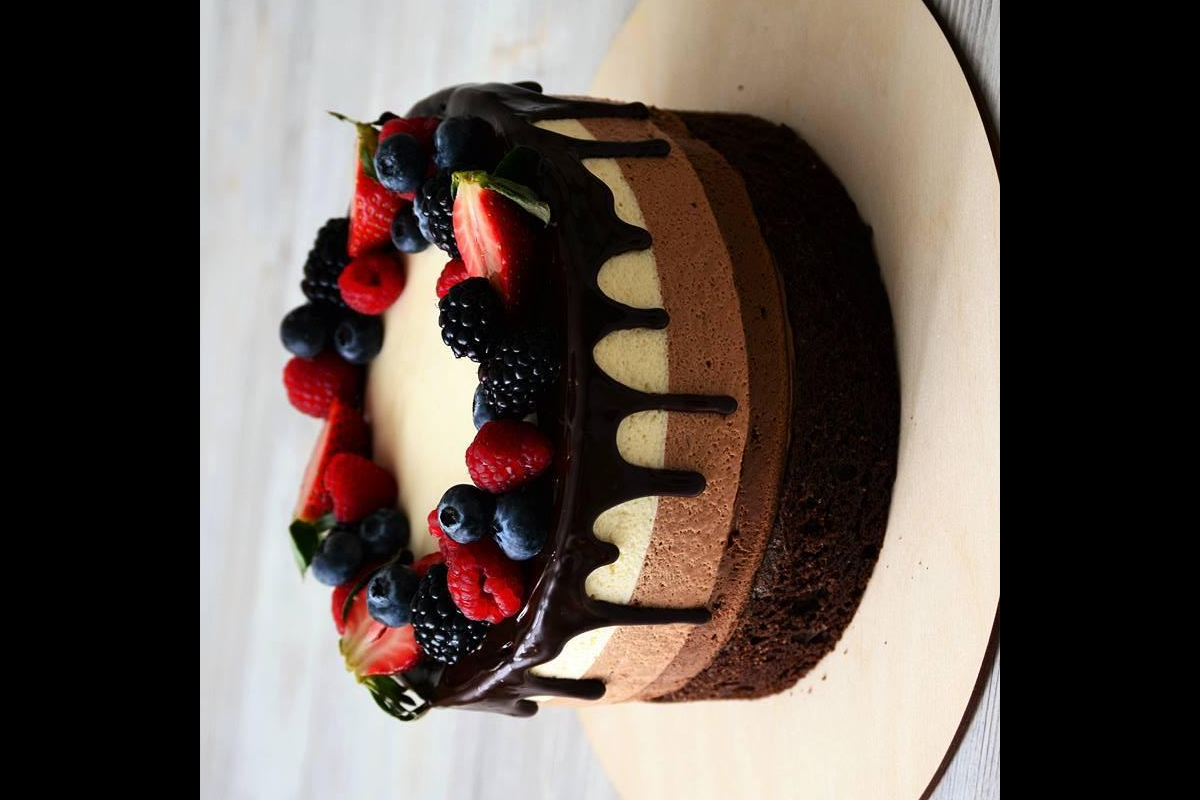

In [ ]:
(h, w, c) = img.shape

M = cv2.getRotationMatrix2D((w/2, h/2), 90, 1)
# Cтрока выше создает двумерную матрицу вращения M с помощью функции cv2.getRotationMatrix2D() 
# Функция принимает три аргумента: центральную точку вращения (заданную как (w/2, h/2) для вращения вокруг центра изображения), 
# угол поворота (заданный как 90 градусов в этом примере. Положительное число – поворот против часовой стрелки, отрицательное – по часовой) 
# и коэффициент масштабирования (заданный как 1 для сохранения размера изображения).

rotated_img = cv2.warpAffine(img, M, (w, h))
# Эта строка применяет матрицу вращения M к входному изображению img с помощью функции cv2.warpAffine()
# Функция принимает три аргумента: входное изображение, матрицу преобразования M 
# и размер выходного изображения (заданный как (w, h) для сохранения исходного размера изображения).

cv2_imshow(rotated_img)

## Размытие изображения

Чтобы размыть изображение, можно использовать функции `cv2.GaussianBlur()` или `cv2.blur()`.

`cv2.GaussianBlur()` принимает следующие аргументы:
1. изображение,
2. кортеж из 2 положительных нечётных чисел (размер шаблона фильтра Гаусса). Чем больше числа, тем больше сила сглаживания.
3. стандартное отклонение гауссовского ядра (по умолчанию 0). Более высокое значение стандартного отклонения приводит к большему размытию, а более низкое значение стандартного отклонения - к меньшему размытию.

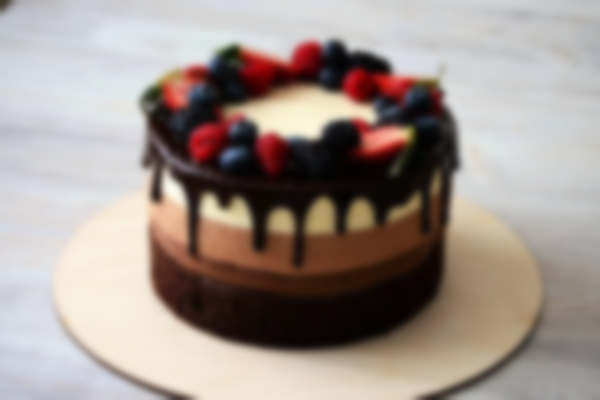

In [ ]:
blurred_img = cv2.GaussianBlur(resized_img, (21, 21), 0)

cv2_imshow(blurred_img)

`cv2.blur()` принимает два аргумента: входное изображение и кортеж из двух чисел. 

Функция использует простую технику усреднения для размытия изображения.

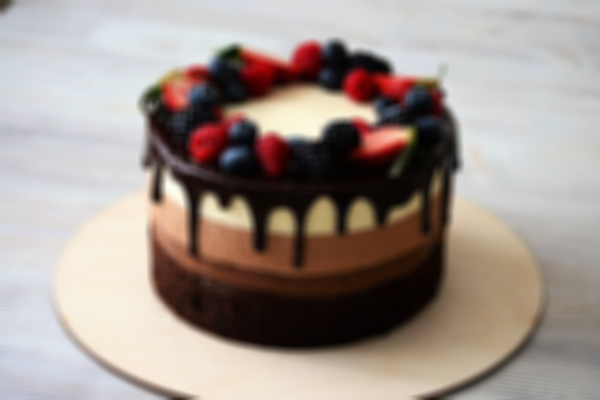

In [ ]:
blurred_img = cv2.blur(resized_img, (10, 10))

cv2_imshow(blurred_img)